## Análisis Exploratorio de Datos (EDA)

Llevaremos a cabo el Análisis Exploratorio de Datos (`EDA`) en cada conjunto de datos derivado del proceso de Extracción, Transformación y Carga (`ETL`). Al completar esta fase, adquiriremos una visión exhaustiva que facilitará la toma de decisiones respecto a las características seleccionadas para entrenar el modelo de recomendación. Este enfoque sistemático garantiza una comprensión detallada de los conjuntos de datos, permitiendo una selección informada de las variables más pertinentes en el contexto del desarrollo del modelo. 

## Importaciones

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


## EDA del dataset `output`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `output` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de archivo parquet y se guarda en un dataframe.

In [5]:
df_output = pd.read_parquet('output_steam_games.parquet')
df_output.head()

,publisher,genres,app_name,release_date,price,item_id,developer
0,2K Games,[Strategy],Railroad Tycoon II Platinum,1998-10-31,4.99,7620.0,PopTop
1,2K Games,[Strategy],X-COM: Terror From the Deep,1995-04-01,4.99,7650.0,"MicroProse Software, Inc"
2,"Square Enix, Feral Interactive (Mac)","[Action, Adventure]",Tomb Raider: Anniversary,2007-06-05,8.99,8000.0,"Crystal Dynamics,Feral Interactive (Mac)"
3,Capcom,[Action],Devil May Cry® 3 Special Edition,2006-05-23,19.99,6550.0,"CAPCOM Co., Ltd."
4,Telltale Games,"[Action, Adventure]",Sam & Max 101: Culture Shock,2006-10-17,19.99,8200.0,Telltale Games


#### Hacemos un explode de genres para poder analizar que cantidad de juegos por genero hay

In [6]:
df_exploded = df_output.explode('genres').reset_index(drop=True)
df_exploded['count'] = df_exploded.groupby(['genres']).cumcount() + 1

### Análisis de cada variable de manera individual

#### Analizamos los duplicados

In [7]:
call_id_counts = df_output['item_id'].value_counts()
call_id_counts

7620.0      1
376964.0    1
448520.0    1
466540.0    1
498240.0    1
           ..
673820.0    1
538680.0    1
683890.0    1
683610.0    1
658870.0    1
Name: item_id, Length: 22767, dtype: int64

No muestra usuarios duplicados

### Analizamos los tipos de datos y si hay nulos

In [8]:
fila_resultado = df_output[df_output.isnull().all(axis=1)]
fila_resultado

,publisher,genres,app_name,release_date,price,item_id,developer


No se muestran valores NaN o nulos

In [9]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22767 entries, 0 to 22766
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22767 non-null  object 
 1   genres        22767 non-null  object 
 2   app_name      22767 non-null  object 
 3   release_date  22767 non-null  object 
 4   price         22767 non-null  float64
 5   item_id       22767 non-null  float64
 6   developer     22767 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.2+ MB


Se revisan los tipos de datos y no se observan datos nulos ni valores faltantes, lo que corresponde a nuestro ETL Luego de haber realizado limpieza de los mismos

### Deteccion de Outliers

In [10]:
df_output.describe()

,price,item_id
count,22767.000000,2.276700e+04
mean,9.353512,4.313676e+05
std,16.916944,1.910907e+05
min,0.000000,1.000000e+01
25%,2.990000,3.035400e+05
50%,4.990000,4.270500e+05
75%,9.990000,5.808325e+05
max,995.000000,2.028850e+06


Creamos los cuadros de precio por juego

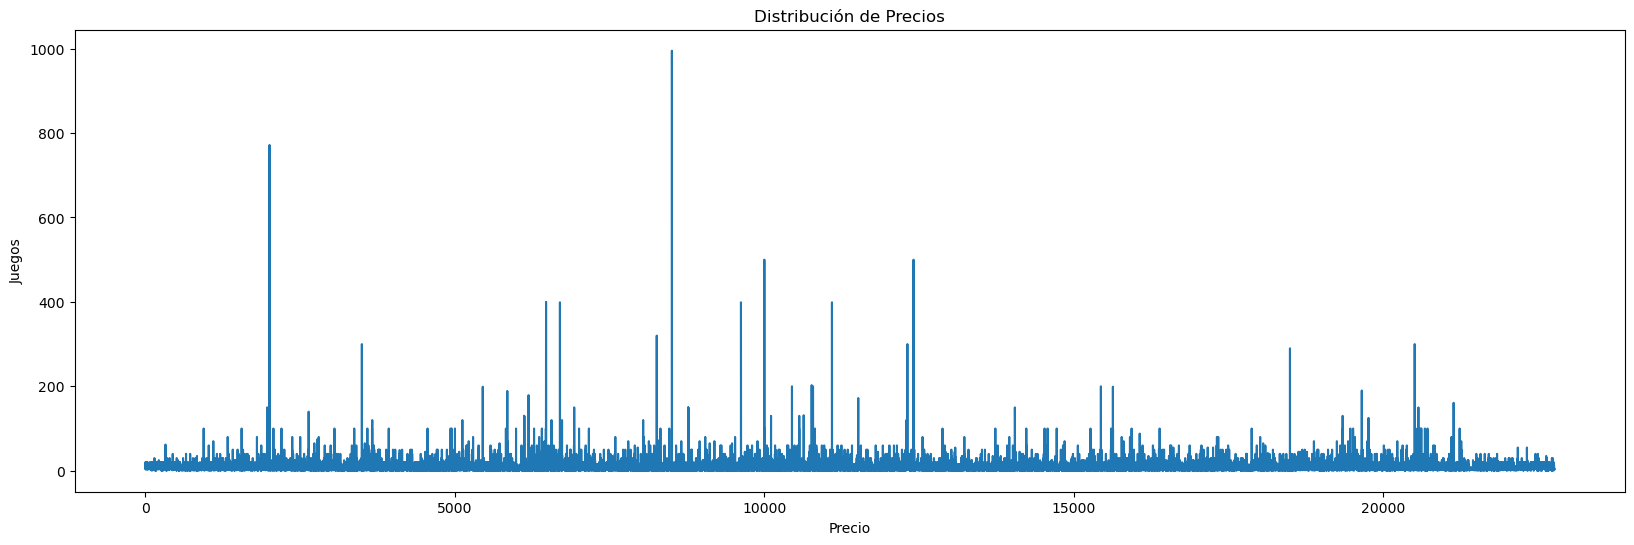

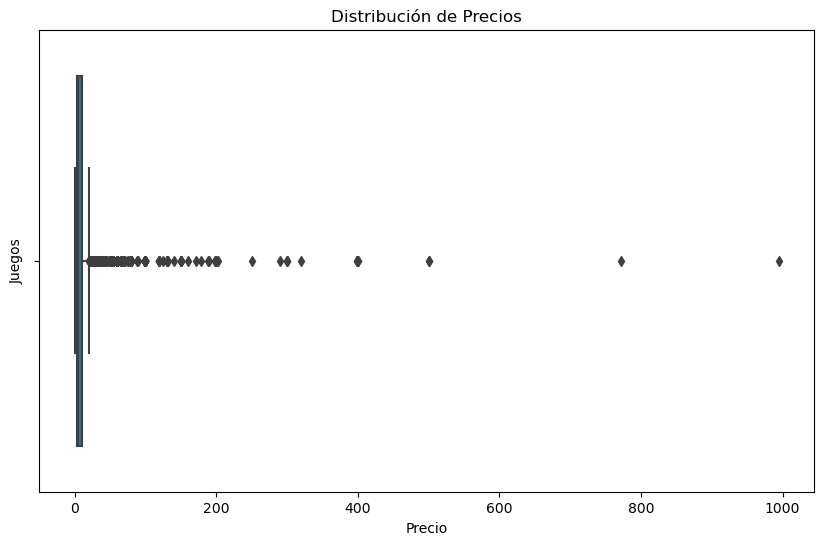

In [11]:

plt.figure(figsize=(20, 6))
sns.lineplot(df_output['price'])
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Juegos')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_output['price'])
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Juegos')
plt.show()

#### Detectamos algunos outliers, pasamos a analizarlos

In [12]:
fila_resultado = df_output.nlargest(5, 'price')
print(fila_resultado)

                        publisher  \
8509   Strata Mixed Reality, Inc.   
2008                Aerosoft GmbH   
10003             RUHRSOURCE GmbH   
12413                         CCP   
6475              YoYo Games Ltd.   

                                                  genres  \
8509   [Animation &amp; Modeling, Design &amp; Illust...   
2008                                        [Simulation]   
10003  [Animation &amp; Modeling, Design &amp; Illust...   
12413         [Free to Play, Massively Multiplayer, RPG]   
6475   [Animation &amp; Modeling, Design &amp; Illust...   

                                                app_name release_date   price  \
8509     Strata Spaces VR – Professional Edition Upgrade   2017-10-26  995.00   
2008                          X-Plane 10 Global - 64 Bit   2014-07-14  771.71   
10003  CUR3D Maker Edition - Permission for commercia...   2017-11-06  499.99   
12413                             EVE Online: 15400 PLEX   2017-05-09  499.99   
6475       

#### Como se puede ver, los outliers pertenecen a juegos y programas con valores altos, se puede proceder con estos datos

### Analizamos la cantidad de generos, registros, juegos y desarrolladores hay

In [13]:
call_id_counts = df_exploded['genres'].value_counts()
print(call_id_counts)

Indie                        12675
Action                        9413
Adventure                     7015
Casual                        6286
Strategy                      5207
Simulation                    4715
RPG                           3800
Free to Play                  1453
Early Access                  1369
Sports                        1027
Racing                         941
Massively Multiplayer          813
Design &amp; Illustration      343
Utilities                      242
Web Publishing                 209
Animation &amp; Modeling       132
Education                      109
Software Training               86
Video Production                80
Audio Production                69
Photo Editing                   40
Accounting                       7
Name: genres, dtype: int64


In [14]:
print(f'La cantidad de registros que hay son: {df_output.shape[0]}')


La cantidad de registros que hay son: 22767


In [15]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de desarrolladores: {len(df_output['publisher'].unique())}")

Cantidad de desarrolladores: 7903


In [16]:
print(f"Cantidad de titulos disponibles: {len(df_output['app_name'].unique())}")

Cantidad de titulos disponibles: 22751


### Analizamos cuantos juegos son gratis

In [17]:
publishers_price_zero = df_output.loc[df_output['price'] == 0, 'publisher'].unique()
count_publishers_price_zero = len(publishers_price_zero)
print(f"Cantidad de desarrolladores con juegos gratis: {count_publishers_price_zero}")

Cantidad de desarrolladores con juegos gratis: 994


In [18]:
free_games_count = len(df_output[df_output['price'] == 0]['app_name'].unique())
print(f"Cantidad de juegos gratis: {free_games_count}")

Cantidad de juegos gratis: 1323


## EDA del dataset  `user_items`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_items` que ya pasó por el proceso de ETL.

In [19]:
df_items = pd.read_parquet('user_items.parquet')
df_items.head()

,user_id,item_id,playtime_forever
0,76561197970982479,10,6.0
1,76561197970982479,30,7.0
2,76561197970982479,300,4733.0
3,76561197970982479,240,1853.0
4,76561197970982479,3830,333.0


### Analizamos los Nulos

In [20]:
fila_resultado = df_items[df_items.isnull().all(axis=1)]
fila_resultado

,user_id,item_id,playtime_forever


No hay valores nulos

### Analizamos los duplicados

In [21]:
call_id_counts = df_items['user_id'].value_counts()
call_id_counts

chidvd               3475
thugnificent         3160
phrostb              2984
djnemonic            2545
Steamified           2481
                     ... 
76561198075820559       1
76561198099807819       1
76561198066805116       1
76561198066783139       1
76561198096087704       1
Name: user_id, Length: 68403, dtype: int64

En este caso, los valores duplicados son permitidos, puesto que es un usuario respecto a diferentes juegos, si se borran los duplicados, perdemos informacion vital para el analisis de este dashboard

In [22]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285246 entries, 0 to 3285245
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   item_id           object 
 2   playtime_forever  float64
dtypes: float64(1), object(2)
memory usage: 75.2+ MB


Se revisan los tipos de datos y se observan datos nulos, esto es debido a que no necesariamente una de las 3 columnas este obligadas a responder con un valor, mientras que en por lo menos 1 exista un registro que nos pueda sumar para respectivos analisis

In [23]:
print(f"Cantidad de usuarios: {len(df_items['user_id'].unique())}")

Cantidad de usuarios: 68403


In [24]:
print(f"Cantidad de horas jugadas en total: {df_items['playtime_forever'].sum()}")

Cantidad de horas jugadas en total: 5109381683.0


### Deteccion de Outliers

In [25]:
df_items.describe()

,playtime_forever
count,3.285246e+06
mean,1.555251e+03
std,6.721032e+03
min,1.000000e+00
25%,4.400000e+01
50%,2.050000e+02
75%,8.080000e+02
max,6.427730e+05


Creamos las tablas de minutos jugados

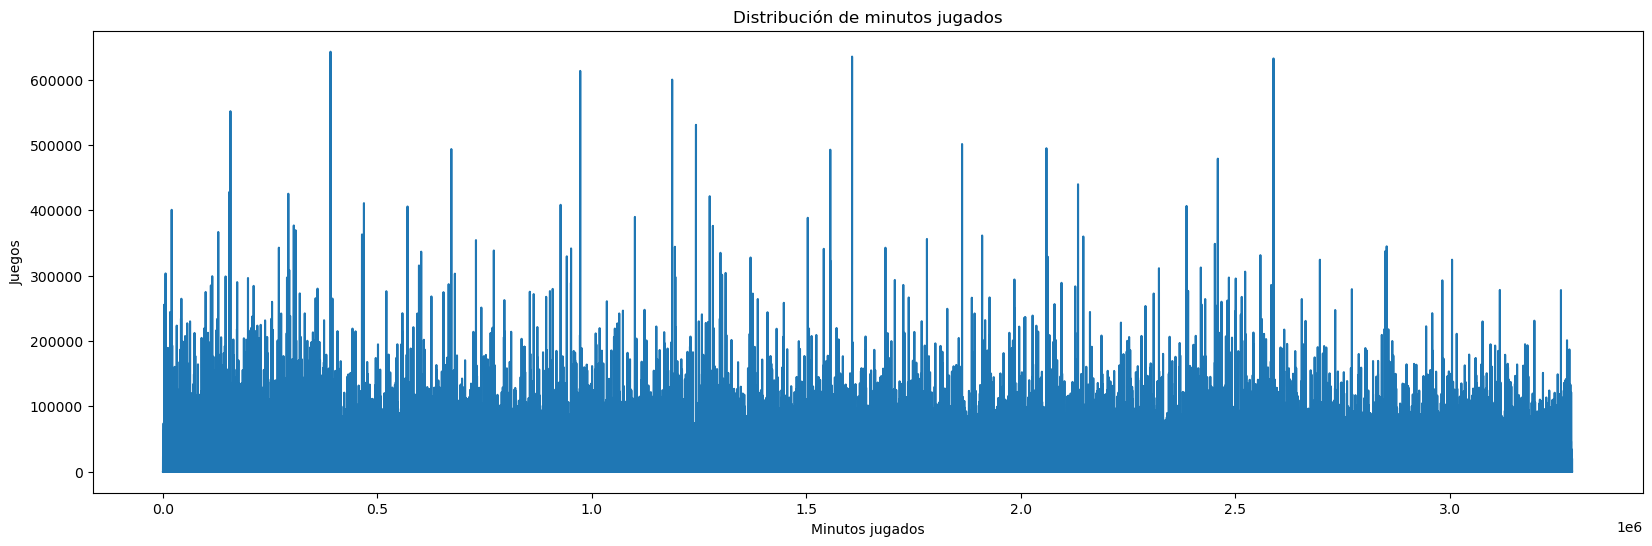

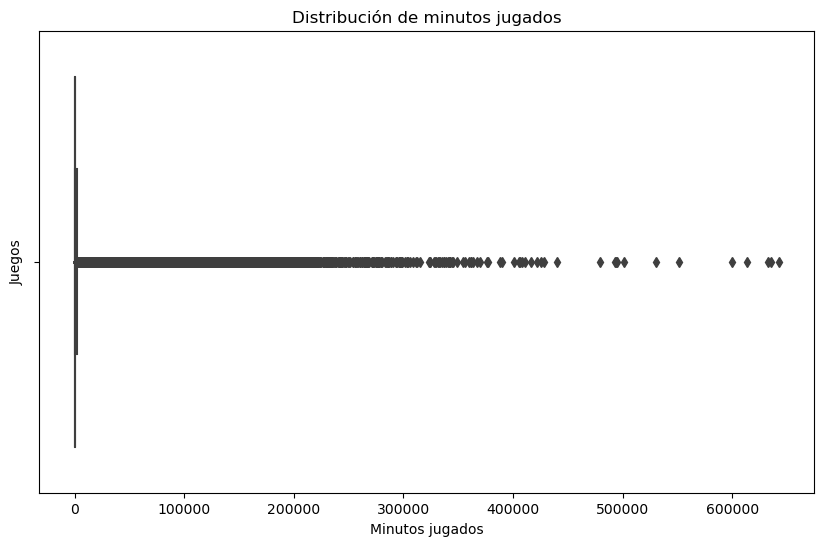

In [26]:
plt.figure(figsize=(20, 6))
sns.lineplot(df_items['playtime_forever'])
plt.title('Distribución de minutos jugados')
plt.xlabel('Minutos jugados')
plt.ylabel('Juegos')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_items['playtime_forever'])
plt.title('Distribución de minutos jugados')
plt.xlabel('Minutos jugados')
plt.ylabel('Juegos')
plt.show()

In [27]:
fila_resultado = df_items.nlargest(5, 'playtime_forever')
print(fila_resultado)

                   user_id item_id  playtime_forever
390625               wolop    4000          642773.0
1606608        Evilutional  212200          635295.0
2589144  76561198019826668   42710          632452.0
972787   76561198039832932    4000          613411.0
1187140         tsunamitad   72200          600068.0


En este caso los Outliers detectados representan la cantidad de minutos de juego de un usuario en particular, es posible que tengamos jugadores muy compenetrados con un juego y registre altas horas de game play

## EDA del dataset  `user_reviews`
En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_reviews` que ya pasó por el proceso de ETL.

In [28]:
df_reviews = pd.read_parquet('user_reviews.parquet')
df_reviews.head()

,posted,item_id,recommend,review,user_id,Sentiment_analysis
0,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,76561197970982479,2
1,2011-07-15,22200,True,It's unique and worth a playthrough.,76561197970982479,2
2,2011-04-21,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,1
3,2014-06-24,251610,True,I know what you think when you see this title ...,js41637,2
4,2013-09-08,227300,True,For a simple (it's actually not all that simpl...,js41637,1


### Analizamos los Nulos

In [29]:
fila_resultado = df_reviews[df_reviews.isnull().all(axis=1)]
fila_resultado

,posted,item_id,recommend,review,user_id,Sentiment_analysis


No hay nulos

### Analizamos los duplicados

In [30]:
call_id_counts = df_reviews['user_id'].value_counts()
call_id_counts

76561198108415635      10
NanoPi                 10
banksyyo               10
snubbo                 10
BuffinMutton           10
                       ..
554076033               1
_maximus                1
maxstupo                1
maxy21                  1
SkullainnLovesGoats     1
Name: user_id, Length: 25458, dtype: int64

In [31]:
call_id_counts = df_reviews['item_id'].value_counts()
call_id_counts

730       3708
440       3694
4000      1704
570       1544
218620    1113
          ... 
33100        1
312720       1
449980       1
32770        1
431510       1
Name: item_id, Length: 3682, dtype: int64

In [32]:
call_id_counts = df_reviews['posted'].value_counts()
call_id_counts

2014-06-21    220
2014-06-20    192
2014-06-27    171
2014-06-23    171
2013-12-26    169
             ... 
2011-03-25      1
2011-11-16      1
2011-05-28      1
2012-02-01      1
2012-11-03      1
Name: posted, Length: 1906, dtype: int64

### Analizamos los tipos de datos

In [33]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   posted              58431 non-null  datetime64[ns]
 1   item_id             58431 non-null  object        
 2   recommend           58431 non-null  bool          
 3   review              58431 non-null  object        
 4   user_id             58431 non-null  object        
 5   Sentiment_analysis  58431 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 2.3+ MB


In [34]:
print(f"Cantidad de usuarios que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios que opinaron: 25458


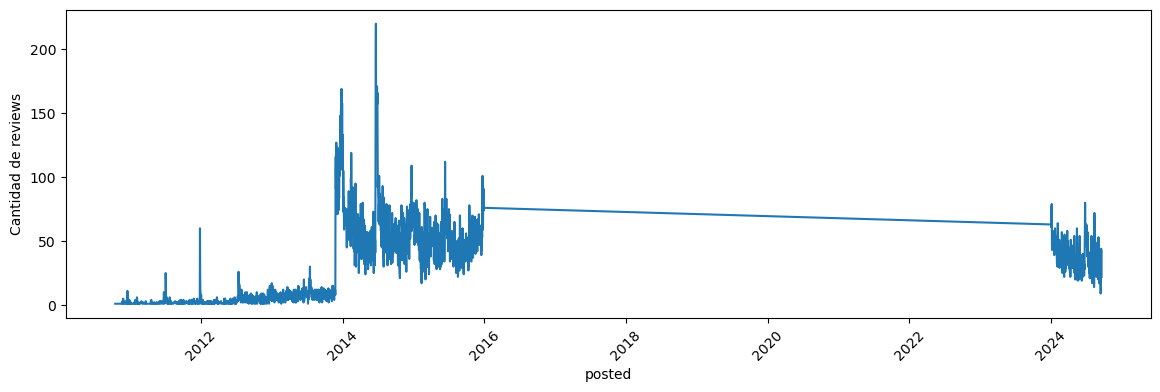

In [35]:
# Calcula la cantidad de review por fecha

df_filtered = df_reviews[df_reviews['posted'] != 2024]
df_counts = df_filtered.groupby("posted").count()
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="posted", y="review")
plt.ylabel('Cantidad de reviews')
plt.xticks(rotation=45)
plt.show()

#### Segun el cuadro, vemos un patron exponencial desde el año 2014, los comentarios que figuran en 2024, son comentarios que no tenian año, pero se le agrego asi tambien podemos verlos, aunque sea como outliers y tenerlos disponibles para su analisis

### Recomendaciones por `Sentiment_analysis` y `recommend`

In [36]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['Sentiment_analysis', 'recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
Sentiment_analysis recommend                      
0                  False          2470    4.227208
                   True           5500    9.412812
1                  False          3175    5.433759
                   True          21398   36.620972
2                  False          1094    1.872294
                   True          24794   42.432955

Lease como Positivos = 1, Neutrales = 2, Negativos = 0

Se puede ver que el sentimiento neutral recomienda el juego por lo que un podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un sentimiento negativo, aún recomienda el juego, lo que es algo contradictorio, a lo mejor simplemente no le gusto alguna parte del mismo, pero aun asi lo recomienda.

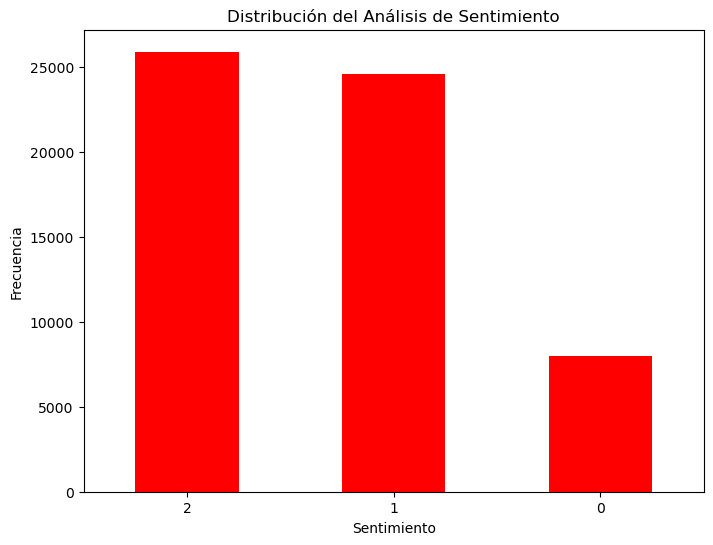

In [37]:
# Calcular la frecuencia de cada valor en la columna Sentiment_analysis
sentiment_counts = df_reviews['Sentiment_analysis'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='red')
plt.title('Distribución del Análisis de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.show()